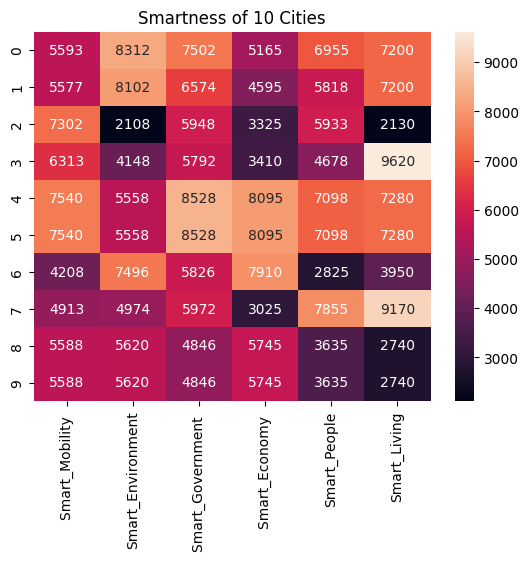

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

world_cities = pd.read_csv('worldcities.csv')
cities = pd.read_csv('Cities.csv')
continent = pd.read_csv('continent.csv')

cities = cities[['Id', 'City', 'Country', 'Smart_Mobility ', 'Smart_Environment', 'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living']]

merged_cities = pd.merge(cities, world_cities, left_on='City', right_on='city', how='inner',sort=True)
merged_countries = pd.merge(merged_cities, continent, left_on='Country', right_on='Country_Name', how='inner')

heatmap_data=merged_cities[['Smart_Mobility ', 'Smart_Environment', 'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living']].head(10)
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title('Smartness of 10 Cities')
plt.show()

map_cities = folium.Map()
for index, row in merged_countries.head(10).iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['City']).add_to(map_cities)
map_cities